In [1]:
import sys
import numpy as np
import exemplos.plot_graph as pg
import matplotlib.pyplot as plt
from exemplos.GFT import GFT
from functools import reduce

import warnings
warnings.filterwarnings('ignore')
import networkx as nx

import seaborn as sns
from matplotlib.colors import ListedColormap


In [2]:
# adj_file = 'exemplos/points40_2d3.adj'
# xy_file = 'exemplos/points40_2d3.xy'

adj_file = 'exemplos/pert400+.adj'
xy_file = 'exemplos/pert400+.xy'

A = np.loadtxt(adj_file)
p = np.loadtxt(xy_file)

D = np.diag(np.sum(A,axis=0))
L = D - A

G=nx.from_numpy_matrix(A)



In [12]:
############
## Filtering a Step Function
############
n = p.shape[0]
fs = np.zeros((n,1))
fs[n//2:,0] = 1.0
fsp = fs + np.random.uniform(low=-0.3, high=0.3, size=(n,1))

#### original #####
gft = GFT(L)
gft.set_signal(fs)
spc_fs = gft.gft()

#### Perturbed #####
gftp = GFT(L)
gftp.set_signal(fsp)
spc_fsp = gftp.gft()


#### Filter #####
S = gft.get_spec()
h = np.exp(np.divide(-(20*S)**2,2.0*S[-1]))
h1 = np.exp(np.divide(-(4*S)**2,2.0*S[-1]))
h2 = np.exp(np.divide(-(3*(S[-1]-S))**2,2.0*S[-1]))
he = (h1+h2)
spc_fsplow = gftp.filtering(h.ravel())
spc_fspenh = gftp.filtering(he.ravel())

gftplow = GFT(L)
gftplow.set_gft_as_kernel(spc_fsplow)
ifsplow = gftplow.igft()

gftpenh = GFT(L)
gftpenh.set_gft_as_kernel(spc_fspenh)
ifspenh = gftpenh.igft()

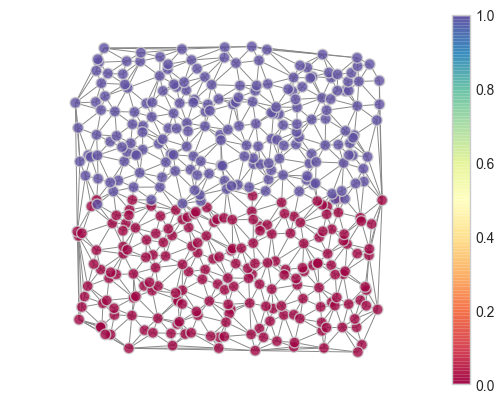

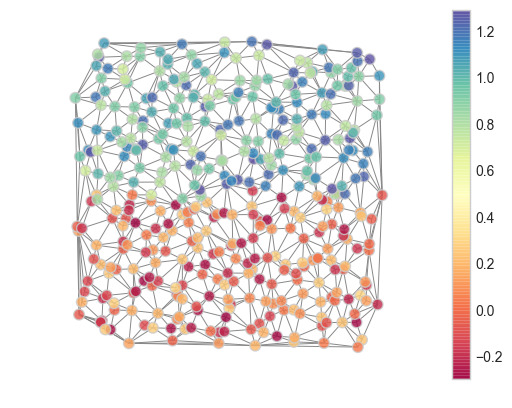

In [13]:

# cmap = ListedColormap(sns.color_palette("GnBu_d",255)[::-1])
# cmap = sns.cubehelix_palette(as_cmap=True, start=.5, rot=-.75)
# cmap = sns.diverging_palette(245, 20, n=7,as_cmap=True)
# cmap = ListedColormap(sns.color_palette('RdYlBu', 255)[:-25])
cmap = ListedColormap(sns.color_palette('Spectral', 255))

nodes = nx.draw_networkx_nodes(G, pos=p,node_color=fs, node_size=60, cmap=cmap)
nodes.set_edgecolor('#cccccc')
nodes.set_alpha(.8)
nx.draw_networkx_edges(G, pos=p,  edge_color="#888888", width=.7)
plt.gca().set_aspect('equal', 'datalim')
# plt.gca().grid()
plt.colorbar(nodes)
plt.axis('off')
plt.savefig('step_function.pdf',bbox_inches='tight')
plt.show()

nodes = nx.draw_networkx_nodes(G, pos=p,node_color=fsp, node_size=60, cmap=cmap)
nodes.set_edgecolor('#cccccc')
nodes.set_alpha(.8)
nx.draw_networkx_edges(G, pos=p,  edge_color="#888888", width=.7)
plt.gca().set_aspect('equal', 'datalim')
# plt.gca().grid()
plt.colorbar(nodes)
plt.axis('off')
plt.savefig('step_function_noisy.pdf',bbox_inches='tight')
plt.show()


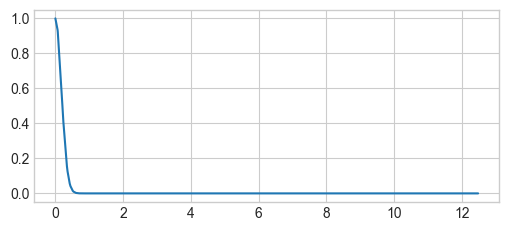

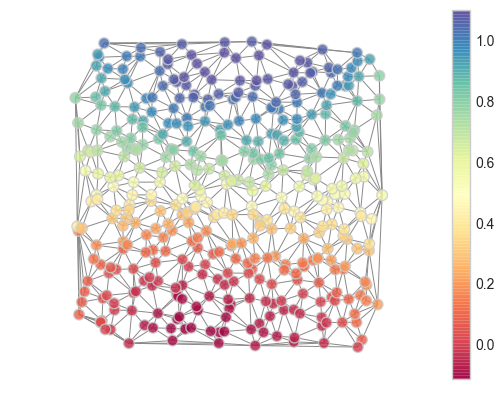

In [14]:
sns.set_style("whitegrid")
# plt.gca().xaxis.grid(False)
# plt.gca().yaxis.grid(False)

plt.figure(figsize=(6,2.5))
plt.plot(S, h)
plt.savefig('step_low_filter.pdf',bbox_inches='tight')
plt.show()

nodes = nx.draw_networkx_nodes(G, pos=p, node_color=ifsplow, node_size=60, cmap=cmap)
nodes.set_edgecolor('#cccccc')
nodes.set_alpha(.8)
nx.draw_networkx_edges(G, pos=p,  edge_color="#888888", width=.7)
plt.gca().set_aspect('equal', 'datalim')
# plt.gca().grid()
plt.colorbar(nodes)
plt.axis('off')
plt.savefig('step_low.pdf',bbox_inches='tight')
plt.show()


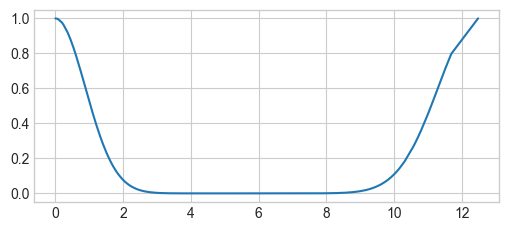

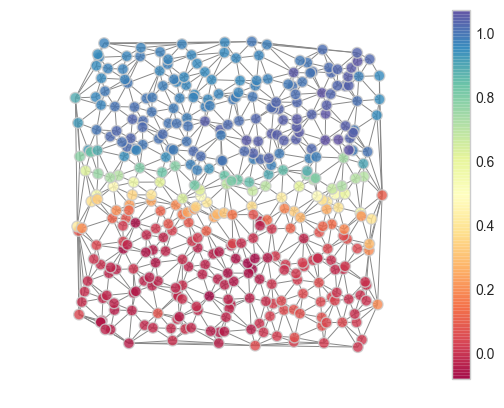

In [15]:
sns.set_style("whitegrid")
# plt.gca().xaxis.grid(False)
# plt.gca().yaxis.grid(False)

plt.figure(figsize=(6,2.5))
plt.plot(S, he)
plt.savefig('step_enh_filter.pdf',bbox_inches='tight')
plt.show()

nodes = nx.draw_networkx_nodes(G, pos=p, node_color=ifspenh, node_size=60, cmap=cmap)
nodes.set_edgecolor('#cccccc')
nodes.set_alpha(.8)
nx.draw_networkx_edges(G, pos=p,  edge_color="#888888", width=.7)
plt.gca().set_aspect('equal', 'datalim')
# plt.gca().grid()
plt.colorbar(nodes)
plt.axis('off')
plt.savefig('step_enh.pdf',bbox_inches='tight')
plt.show()
